# Notebook 2-3: Plot HMM Networks

In this notebook, we will cover:
1. **Power maps visualisation**: How to plot power maps for each HMM state.
2. **Connectivity maps visualisation**: How to plot connectivity maps for each HMM state.

# 1. Power maps visualisation
In this section, we will plot the power map for each HMM state. First we will load the spectral content of the HMM states we computed in the previous notebook with multitaper.

In [1]:
import numpy as np
f = np.load("results/spectra/f.npy")
psd = np.load("results/spectra/psd.npy")
coh = np.load("results/spectra/coh.npy")
w = np.load("results/spectra/w.npy")
nnmf = np.load("results/spectra/nnmf_2.npy")

We will first have a look at the 2 components from the non-negative matrix factorisation. Note we have provided the nnmf components if we have the full 114 sessions from Wakeman-Henson.

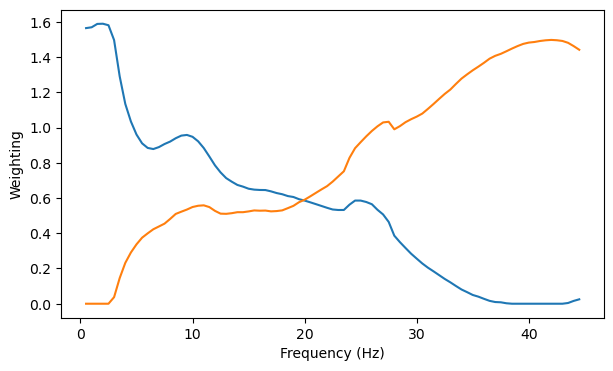

In [2]:
import os
from osl_dynamics.utils import plotting

os.makedirs("plots", exist_ok=True)
fig, ax = plotting.plot_line(
    [f, f],
    nnmf,
    x_label="Frequency (Hz)",
    y_label="Weighting",
)
fig.savefig("plots/nnmf_2.png",)

Now we can integrate the PSD across frequency and plot the power maps

Saving images:   0%|          | 0/6 [00:00<?, ?it/s]

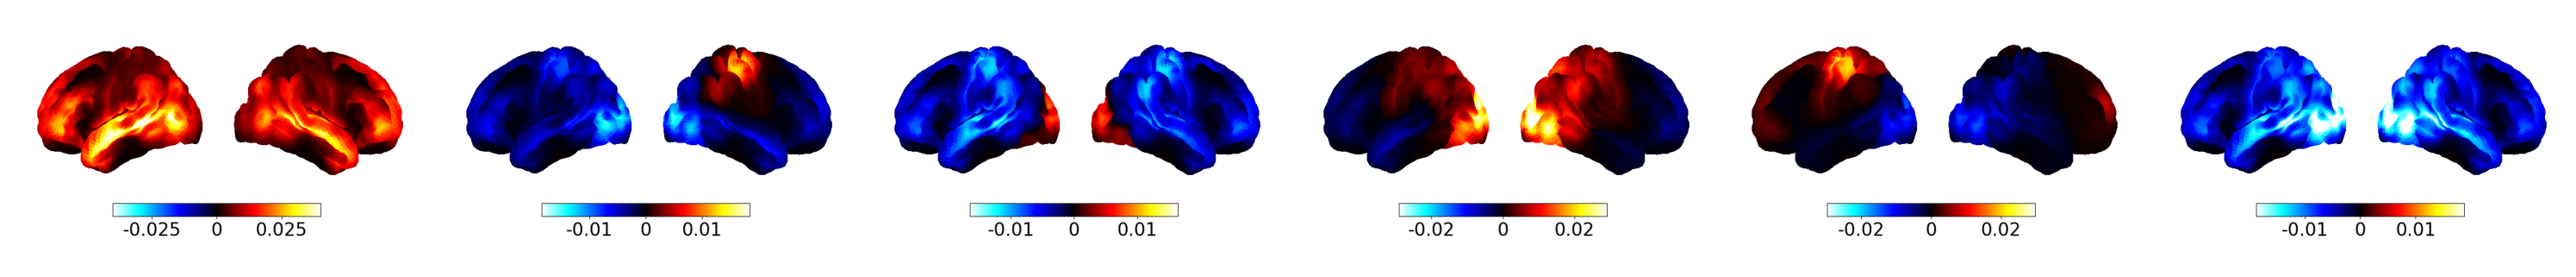

In [3]:
from osl_dynamics.analysis import power

gpsd = np.average(psd, axis=0, weights=w)
p = power.variance_from_spectra(f, gpsd, nnmf)
power.save(
    p,
    mask_file="MNI152_T1_8mm_brain.nii.gz",
    parcellation_file="fmri_d100_parcellation_with_PCC_reduced_2mm_ss5mm_ds8mm.nii.gz",
    subtract_mean=True,
    component=0,
    combined=True,
    filename="plots/pow_nnmf-0_.png",
)

# 2. Connectivity maps visualisation
In this section, we will plot the connectivity map (coherence) for each HMM state.

Saving images:   0%|          | 0/6 [00:00<?, ?it/s]

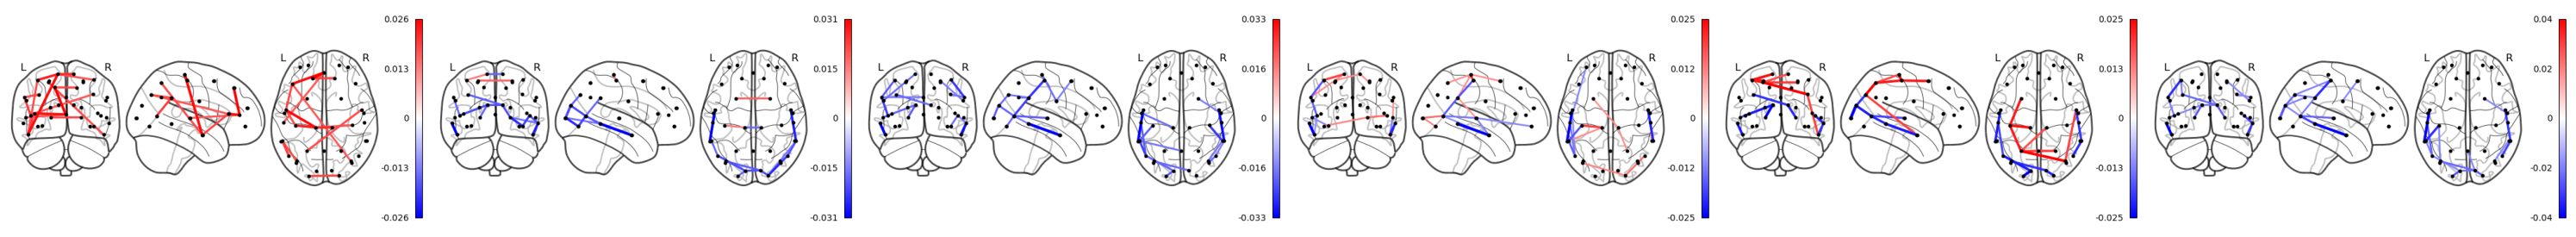

In [4]:
from osl_dynamics.analysis import connectivity

# Plot state coherence networks
gcoh = np.average(coh, axis=0, weights=w)
c = connectivity.mean_coherence_from_spectra(f, gcoh, nnmf)
c -= np.mean(c, axis=0, keepdims=True)
c = connectivity.threshold(c, percentile=98, absolute_value=True)
connectivity.save(
    c,
    parcellation_file="fmri_d100_parcellation_with_PCC_reduced_2mm_ss5mm_ds8mm.nii.gz",
    component=0,
    combined=True,
    filename="plots/coh_nnmf-0_.png",
)

Notice we have thresholded the coherence values to only show the top 2% of the edges for better visualisation.

Exercise: Try to change the threshold and see how the connectivity maps change.

You can also specify a particular frequency range to integrate over.

Saving images:   0%|          | 0/6 [00:00<?, ?it/s]

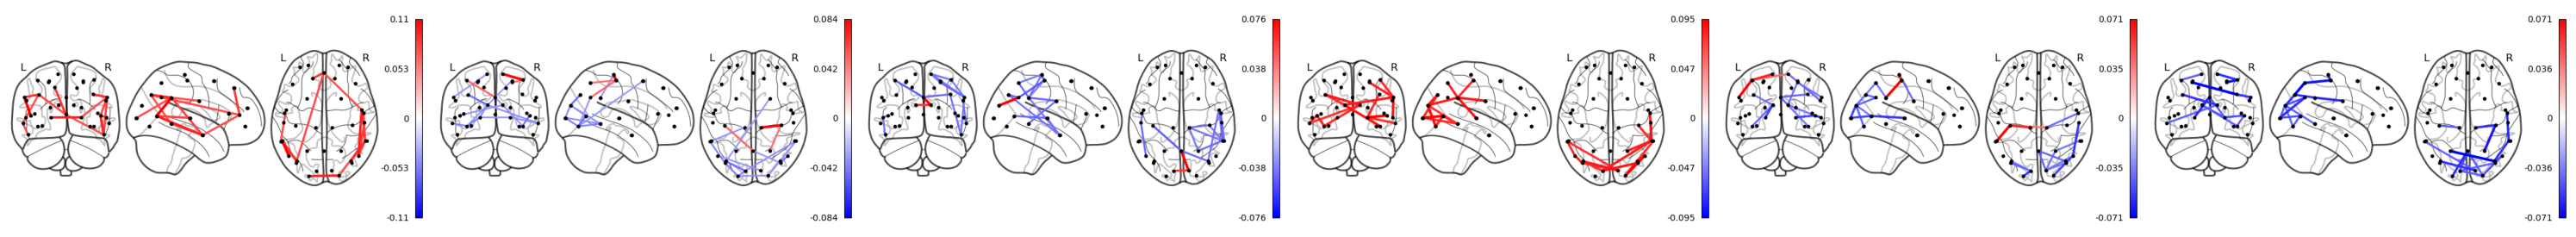

In [5]:
c = connectivity.mean_coherence_from_spectra(f, gcoh, frequency_range=[8, 12])
c -= np.mean(c, axis=0, keepdims=True)
c = connectivity.threshold(c, percentile=98, absolute_value=True)
connectivity.save(
    c,
    parcellation_file="fmri_d100_parcellation_with_PCC_reduced_2mm_ss5mm_ds8mm.nii.gz",
    combined=True,
    filename="plots/coh_alpha-range_.png",
)

Exercise: 
- Try different frequency ranges and similarly do this for power maps.
- Can you plot session-specific power and connectivity maps?